In [3]:
import numpy as np
import pandas as pd

In [4]:
import geopandas as gpd

df = pd.read_csv("C:/Users/dm93/Downloads/listings_california.csv.gz")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20211205213202,2021-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20211205213202,2021-12-06,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,"Run Runyon Canyon, Our Gym & Sauna Open <br />...","Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,4.97,5.00,4.85,NaN,t,3,0,3,0,0.69
2,2732,https://www.airbnb.com/rooms/2732,20211205213202,2021-12-06,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.35
3,2864,https://www.airbnb.com/rooms/2864,20211205213202,2021-12-06,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,https://www.airbnb.com/rooms/3021,20211205213202,2021-12-07,Hollywood Hills Zen Modern style Apt/Guesthouse,A very Modern Hollywood Hills Zen style galler...,This is the famous Hollywood hills.. Historica...,https://a0.muscache.com/pictures/5147dcd2-efad...,3415,https://www.airbnb.com/users/show/3415,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.23


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33329 entries, 0 to 33328
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            33329 non-null  int64  
 1   listing_url                                   33329 non-null  object 
 2   scrape_id                                     33329 non-null  int64  
 3   last_scraped                                  33329 non-null  object 
 4   name                                          33327 non-null  object 
 5   description                                   32231 non-null  object 
 6   neighborhood_overview                         20108 non-null  object 
 7   picture_url                                   33329 non-null  object 
 8   host_id                                       33329 non-null  int64  
 9   host_url                                      33329 non-null 

In [6]:
df['superhosts'] = df["host_is_superhost"] == 1
df['regularhosts'] = df["host_is_superhost"] == 0

In [12]:
df['host_is_superhost'] = (df['host_is_superhost'] !='f').astype(int)

In [7]:
print(df['host_is_superhost'])

0        f
1        t
2        t
3        f
4        f
        ..
33324    f
33325    f
33326    f
33327    f
33328    f
Name: host_is_superhost, Length: 33329, dtype: object


In [8]:
print(df['superhosts'])

0        False
1        False
2        False
3        False
4        False
         ...  
33324    False
33325    False
33326    False
33327    False
33328    False
Name: superhosts, Length: 33329, dtype: bool


In [9]:
BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())

print(BBox)

(-118.93483, -117.6534, 33.33848, 34.81113)


In [10]:
import matplotlib.pyplot as plt

cali = plt.imread("C:/Users/dm93/Desktop/IDS705/LA_map.png")

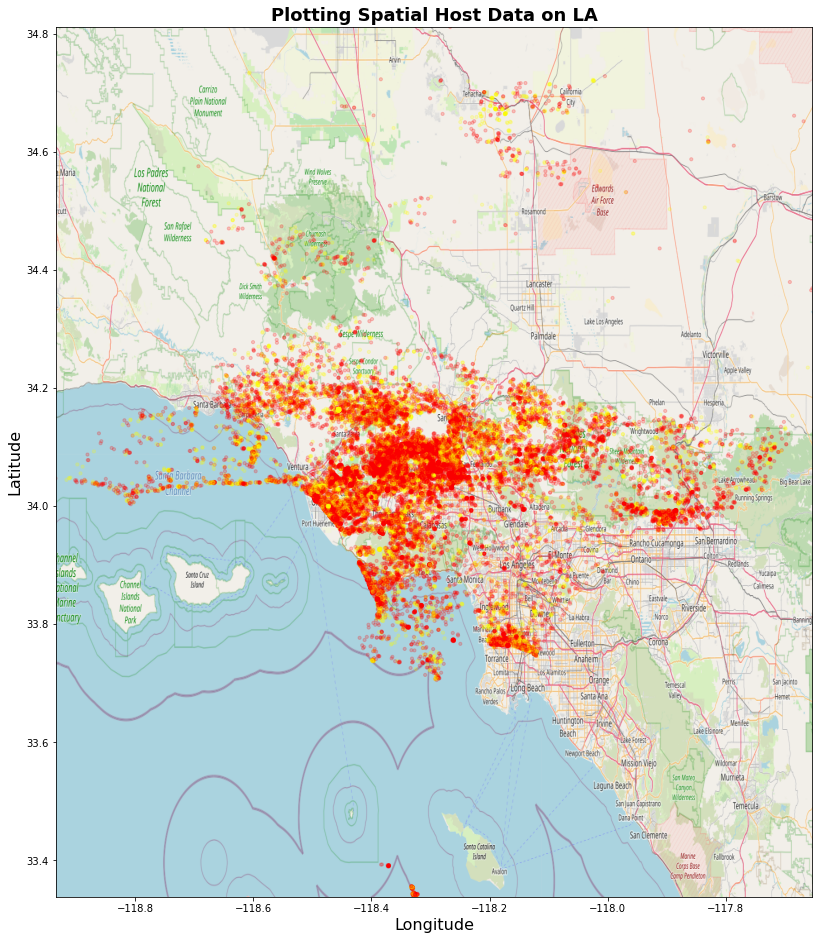

In [13]:
from matplotlib import cm

fig, ax = plt.subplots(figsize = (24, 16))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 0.2, c=df['host_is_superhost'], cmap=plt.cm.autumn, s=10)
ax.set_title('Plotting Spatial Host Data on LA', fontsize=18, fontweight="bold")
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(cali, zorder=0, extent = BBox, aspect= 'equal')

In [14]:
df2 = pd.read_csv("C:/Users/dm93/Downloads/listings_florida.csv.gz")
df2.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,57818,https://www.airbnb.com/rooms/57818,20211223224458,2021-12-24,Private house close to the beach!,Beautifully private duplex that allows you to ...,Check-in window<br />After 3:00 PM<br />Edit<b...,https://a0.muscache.com/pictures/347696/9d5168...,275948,https://www.airbnb.com/users/show/275948,...,4.96,4.88,4.70,NaN,f,1,1,0,0,0.51
1,69824,https://www.airbnb.com/rooms/69824,20211223224458,2021-12-24,2 bd/2ba Oceanfront Condo,<b>The space</b><br />Beautiful and meticulous...,NaN,https://a0.muscache.com/pictures/443102/f6b94e...,351303,https://www.airbnb.com/users/show/351303,...,4.00,5.00,4.00,NaN,f,2,2,0,0,0.04
2,83449,https://www.airbnb.com/rooms/83449,20211223224458,2021-12-24,MARY POP APTS 2/1 APT SLEEP 5,MARY POP APARTMENTS 1&2 BEDROOM SUITES ACCOMMO...,NaN,https://a0.muscache.com/pictures/13dd4c7e-4914...,454736,https://www.airbnb.com/users/show/454736,...,4.89,4.79,4.89,NaN,f,8,8,0,0,0.16
3,105411,https://www.airbnb.com/rooms/105411,20211223224458,2021-12-24,House in the Ranches,Close to Cleveland Clinic Hospital and mayor h...,"Very close to I75, one of the main highways. Y...",https://a0.muscache.com/pictures/787317/2cc18e...,532930,https://www.airbnb.com/users/show/532930,...,5.00,4.25,5.00,NaN,f,1,1,0,0,0.04
4,129061,https://www.airbnb.com/rooms/129061,20211223224458,2021-12-24,MIAMI - LUXURY APARTMENT OVER BEACH,<b>The space</b><br />The apartment is located...,NaN,https://a0.muscache.com/pictures/828456/8efef9...,637272,https://www.airbnb.com/users/show/637272,...,5.00,4.61,4.50,NaN,f,6,6,0,0,0.14


In [15]:
df2['host_is_superhost'] = (df2['host_is_superhost'] !='f').astype(int)

In [16]:
BBox2 = (df2.longitude.min(),   df2.longitude.max(),      
         df2.latitude.min(), df2.latitude.max())

print(BBox2)

(-80.44289, -80.07502, 25.95755, 26.33412)


In [17]:
import matplotlib.pyplot as plt

florida = plt.imread("C:/Users/dm93/Desktop/IDS705/Florida_map.png")

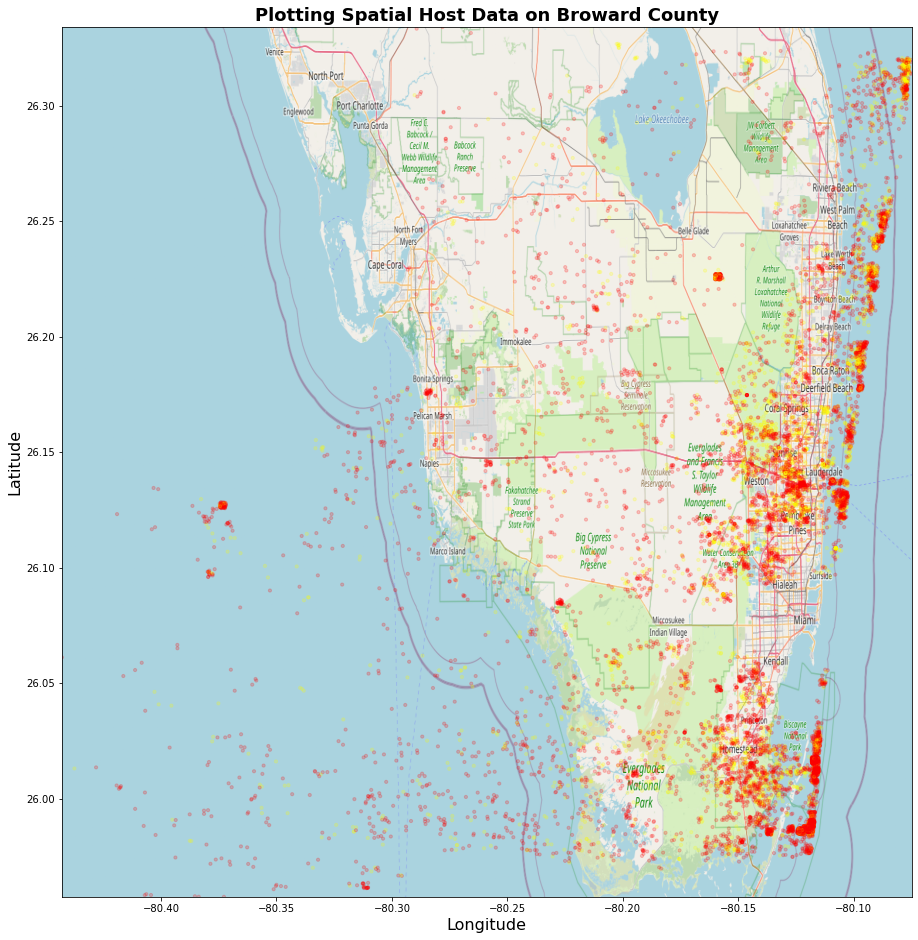

In [20]:
fig, ax = plt.subplots(figsize = (24, 16))
ax.scatter(df2.longitude, df2.latitude, zorder=1, alpha= 0.2, c=df2['host_is_superhost'], cmap=plt.cm.autumn, s=10)
ax.set_title('Plotting Spatial Host Data on Broward County', fontsize=18, fontweight="bold")
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlim(BBox2[0],BBox2[1])
ax.set_ylim(BBox2[2],BBox2[3])
ax.imshow(florida, zorder=0, extent = BBox2, aspect= 'equal')